In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%cd ../scripts/
import sys
import os
sys.path.append("../")
sys.path.append("../Modules")
import analysis

/home/drfrbc/Neural-Modeling/scripts


In [3]:
# Initialize a dictionary to store models
models = {}

# Path for Ben's model
ben_base_path = "L5BaselineResults/"

# Load data for 'ben' model
models['ben'] = {
    'v': np.array(h5py.File(ben_base_path + 'v_report.h5', 'r')['report']['biophysical']['data']),
    # 'hva': np.array(h5py.File(ben_base_path + 'Ca_HVA.ica_report.h5', 'r')['report']['biophysical']['data']),
    # 'lva': np.array(h5py.File(ben_base_path + 'Ca_LVAst.ica_report.h5', 'r')['report']['biophysical']['data']),
    # 'ih': np.array(h5py.File(ben_base_path + 'Ih.ihcn_report.h5', 'r')['report']['biophysical']['data']),
    # 'nmda': np.array(h5py.File(ben_base_path + 'inmda_report.h5', 'r')['report']['biophysical']['data']),
    # 'na': np.array(h5py.File(ben_base_path + 'NaTa_t.gNaTa_t_report.h5', 'r')['report']['biophysical']['data']),
    'spktimes': h5py.File(ben_base_path + 'spikes.h5', 'r')['spikes']['biophysical']['timestamps'][:],
    'spkinds': np.sort((h5py.File(ben_base_path + 'spikes.h5', 'r')['spikes']['biophysical']['timestamps'][:] * 10).astype(int)),
    # 'na_df': pd.read_csv(ben_base_path + 'na.csv'),
    # 'ca_df': pd.read_csv(ben_base_path + 'ca.csv'),
    # 'nmda_df': pd.read_csv(ben_base_path + 'nmda.csv')
}

In [26]:
# Path for the refactored model
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2024-08-02-08-31-54-STA/Complex_Np5"
# /home/drfrbc/Neural-Modeling/scripts/2024-08-12-15-16-33-TuningSynapses_shiftExcGmaxBy10Percent
models['refactored'] = {
    'v': analysis.DataReader.read_data(sim_directory, "v").T,
    # 'hva': analysis.DataReader.read_data(sim_directory, "ica_Ca_HVA").T,
    # 'lva': analysis.DataReader.read_data(sim_directory, "ica_Ca_LVAst").T,
    # 'ih': analysis.DataReader.read_data(sim_directory, "ihcn_Ih").T,
    # 'nmda': analysis.DataReader.read_data(sim_directory, "i_NMDA").T,
    # 'na': analysis.DataReader.read_data(sim_directory, "gNaTa_t_NaTa_t").T,
    'spktimes': analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:],
    'spkinds': np.sort((analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:] * 10).astype(int)),
    # 'na_df': pd.read_csv(os.path.join(sim_directory, 'na.csv')),
    # 'ca_df': pd.read_csv(os.path.join(sim_directory, 'ca.csv')),
    # 'nmda_df': pd.read_csv(os.path.join(sim_directory, 'nmda.csv'))
}

In [27]:
# Load segment data for both models
segs_ben = pd.read_csv(ben_base_path + 'Segments.csv')
segs_degrees = pd.read_csv(ben_base_path + 'SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
segs_ben['segmentID'] = segs_ben.index
segs_ben = segs_ben.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()
segs_ben['Sec ID'] = segs_ben['Sec ID'].astype(int)
segs_ben['X'] = segs_ben['X'].astype(float)
segs_ben['Elec_distanceQ'] = 'None'
segs_ben.loc[segs_ben.Type=='dend','Elec_distanceQ'] = pd.qcut(segs_ben.loc[segs_ben.Type=='dend','Elec_distance'], 10, labels=False)
segs_ben.loc[segs_ben.Type=='apic','Elec_distanceQ'] = pd.qcut(segs_ben.loc[segs_ben.Type=='apic','Elec_distance'], 10, labels=False)

segs_refactored = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))
segs_refactored['Sec ID'] = segs_refactored['idx_in_section_type']
segs_refactored['Type'] = segs_refactored['section']
segs_refactored['Coord X'] = segs_refactored['pc_0']
segs_refactored['Coord Y'] = segs_refactored['pc_1']
segs_refactored['Coord Z'] = segs_refactored['pc_2']
elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'soma'}.csv"))
segs_refactored['Elec_distance'] = elec_dist['25_active']
elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'nexus'}.csv"))
segs_refactored['Elec_distance_nexus'] = elec_dist['25_active']
Xs = []
for seg in segs_refactored['seg']:
    Xs.append(seg.split('(')[-1].split(')')[0])
segs_refactored['X'] = Xs

# continue
segs_refactored['segmentID'] = segs_refactored.index

segs_refactored['Sec ID'] = segs_refactored['Sec ID'].astype(int)
segs_refactored['X'] = segs_refactored['X'].astype(float)
segs_refactored['Elec_distanceQ'] = 'None'

segs_refactored.loc[segs_refactored.Type=='dend','Elec_distanceQ'] = pd.qcut(segs_refactored.loc[segs_refactored.Type=='dend','Elec_distance'], 10, labels=False)
segs_refactored.loc[segs_refactored.Type=='apic','Elec_distanceQ'] = pd.qcut(segs_refactored.loc[segs_refactored.Type=='apic','Elec_distance'], 10, labels=False)

In [28]:
models['ben']['v'][:, :].shape

(1500000, 2526)

In [29]:
models['refactored']['v'][:, :].shape

(1000001, 2511)

In [30]:
apic_segs_ben = segs_ben[segs_ben['Type']=='apic']

In [31]:
apic_segs_refactored = segs_refactored[segs_refactored['Type']=='apic']

In [32]:
apic_segs_refactored.segmentID

1023    1023
1024    1024
1025    1025
1026    1026
1027    1027
        ... 
2503    2503
2504    2504
2505    2505
2506    2506
2507    2507
Name: segmentID, Length: 1485, dtype: int64

Shift 3D coordinates to match

In [48]:
import pandas as pd

# Calculate the min and max for each coordinate of Ben's segments
ben_min_x = apic_segs_ben['Coord X'].min()
ben_max_x = apic_segs_ben['Coord X'].max()
ben_min_y = apic_segs_ben['Coord Y'].min()
ben_max_y = apic_segs_ben['Coord Y'].max()
ben_min_z = apic_segs_ben['Coord Z'].min()
ben_max_z = apic_segs_ben['Coord Z'].max()

# Calculate the min and max for each coordinate of the refactored segments
refactored_min_x = apic_segs_refactored['Coord X'].min()
refactored_max_x = apic_segs_refactored['Coord X'].max()
refactored_min_y = apic_segs_refactored['Coord Y'].min()
refactored_max_y = apic_segs_refactored['Coord Y'].max()
refactored_min_z = apic_segs_refactored['Coord Z'].min()
refactored_max_z = apic_segs_refactored['Coord Z'].max()

# Calculate the average shift needed for each axis
shift_x = ((ben_min_x - refactored_min_x) + (ben_max_x - refactored_max_x)) / 2
shift_y = ((ben_min_y - refactored_min_y) + (ben_max_y - refactored_max_y)) / 2
shift_z = ((ben_min_z - refactored_min_z) + (ben_max_z - refactored_max_z)) / 2

# Apply the shifts to the refactored segments using .loc to avoid SettingWithCopyWarning
apic_segs_refactored.loc[:, 'Coord X'] += shift_x
apic_segs_refactored.loc[:, 'Coord Y'] += shift_y
apic_segs_refactored.loc[:, 'Coord Z'] += shift_z

# Output the shift values and the updated refactored coordinates
print(f"Shift applied to refactored segments: X={shift_x}, Y={shift_y}, Z={shift_z}")


Shift applied to refactored segments: X=1.4210854715202004e-14, Y=1.9539925233402755e-14, Z=0.0


use 3D coordinates to identify matching segment indices

In [34]:
import numpy as np
from scipy.spatial import distance

# Create an empty dictionary to store the mapping from Ben's segments to the refactored segments
segment_mapping = {}

# Loop through each segment in Ben's data
for i, row in apic_segs_ben.iterrows():
    ben_coords = np.array([row['Coord X'], row['Coord Y'], row['Coord Z']])
    
    # Calculate the distance from the current Ben's segment to all segments in the refactored data
    refactored_coords = apic_segs_refactored[['Coord X', 'Coord Y', 'Coord Z']].values
    dists = distance.cdist([ben_coords], refactored_coords, 'euclidean').flatten()
    
    # Find the index of the closest segment in the refactored data
    closest_index = np.argmin(dists)
    
    # Store the mapping (Ben's segment ID -> Refactored segment ID)
    segment_mapping[row['segmentID']] = apic_segs_refactored.iloc[closest_index]['segmentID']

Plot target segments

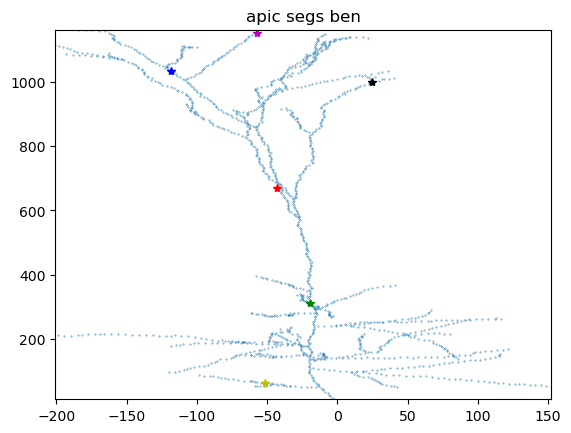

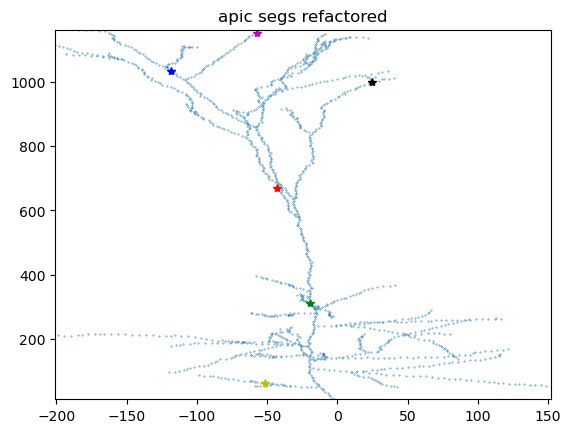

In [49]:
# Calculate the axis limits
all_coords_x = apic_segs_ben['Coord X'].tolist() + apic_segs_refactored['Coord X'].tolist()
all_coords_y = apic_segs_ben['Coord Y'].tolist() + apic_segs_refactored['Coord Y'].tolist()
x_min, x_max = min(all_coords_x), max(all_coords_x)
y_min, y_max = min(all_coords_y), max(all_coords_y)

apic_indices = [1500, 1400, 1900, 2000, 2500, 1800]
colors = ['r*', 'g*', 'b*', 'm*', 'y*', 'k*']
for i,segs in enumerate([apic_segs_ben, apic_segs_refactored]):
    plt.figure()
    plt.scatter(segs['Coord X'], segs['Coord Y'], s=0.1)
    for j,ind in enumerate(apic_indices):
        if i==1:
            ind = segment_mapping[ind]
        plt.plot(segs.loc[segs.segmentID.isin([ind]),'Coord X'],segs.loc[segs.segmentID.isin([ind]),'Coord Y'],colors[j])
    # Set the same axis limits for each plot
    plt.title("apic segs ben" if i == 0 else "apic segs refactored")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [36]:
for model in models:
    print(models[model]['v'].shape)

(1500000, 2526)
(1000001, 2511)


In [37]:
np.arange(50000,100000)

array([50000, 50001, 50002, ..., 99997, 99998, 99999])

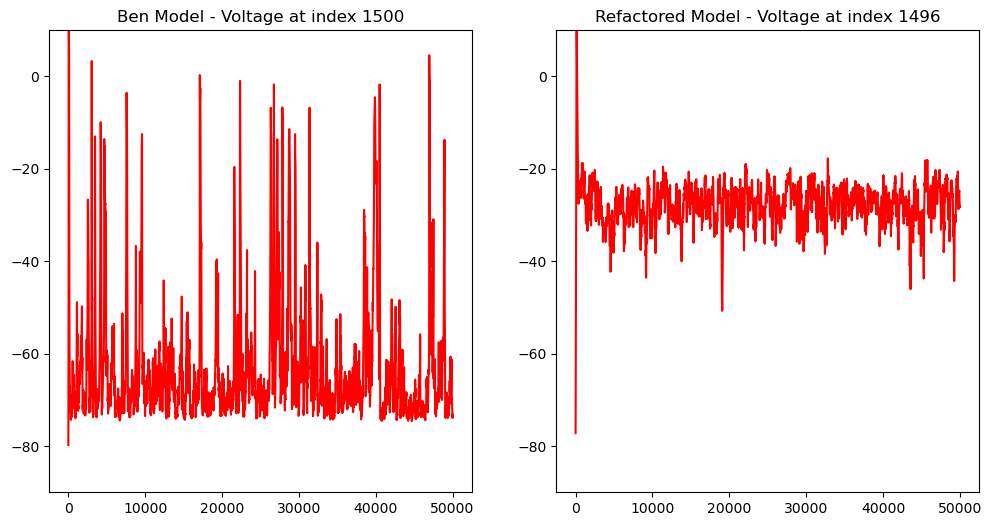

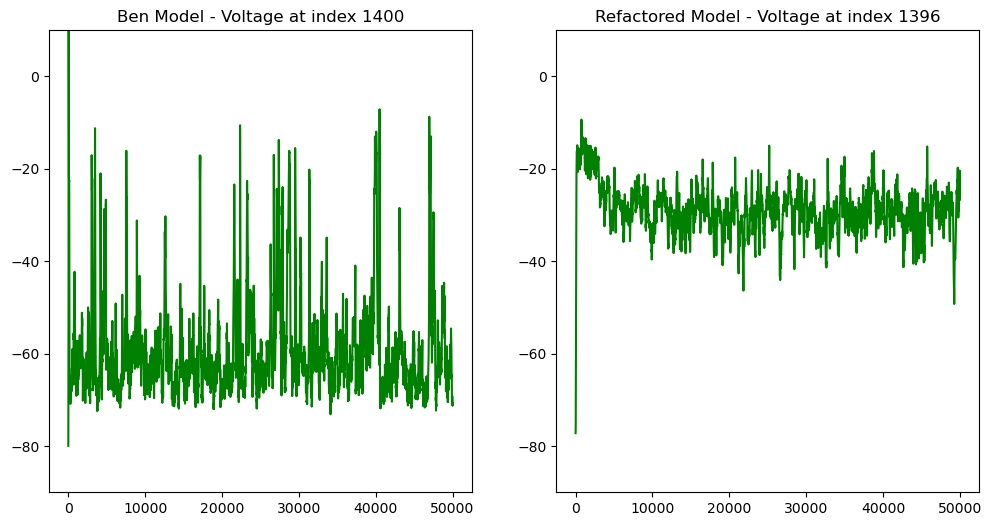

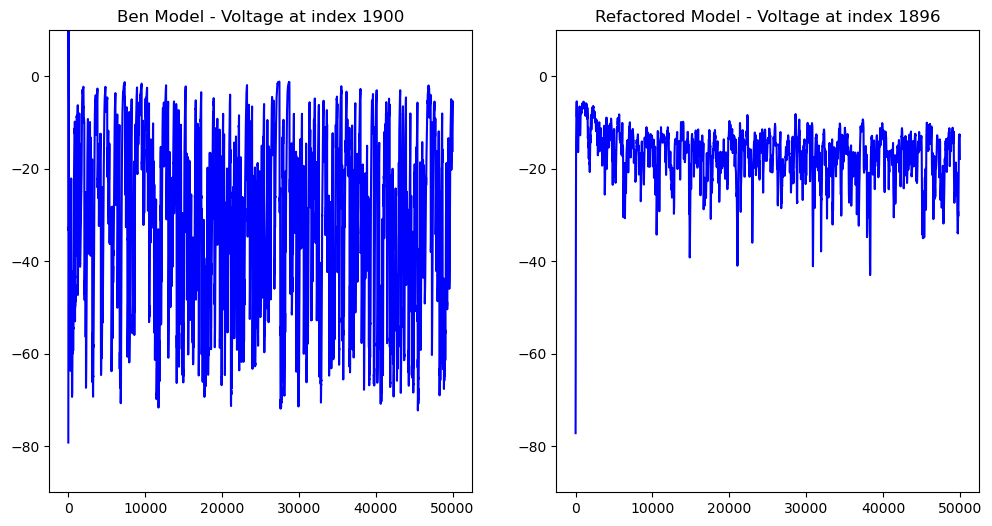

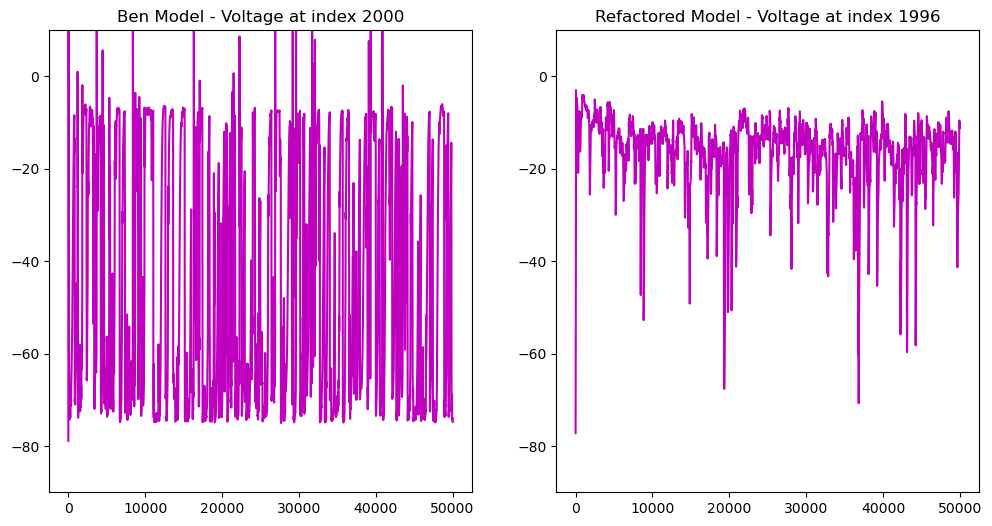

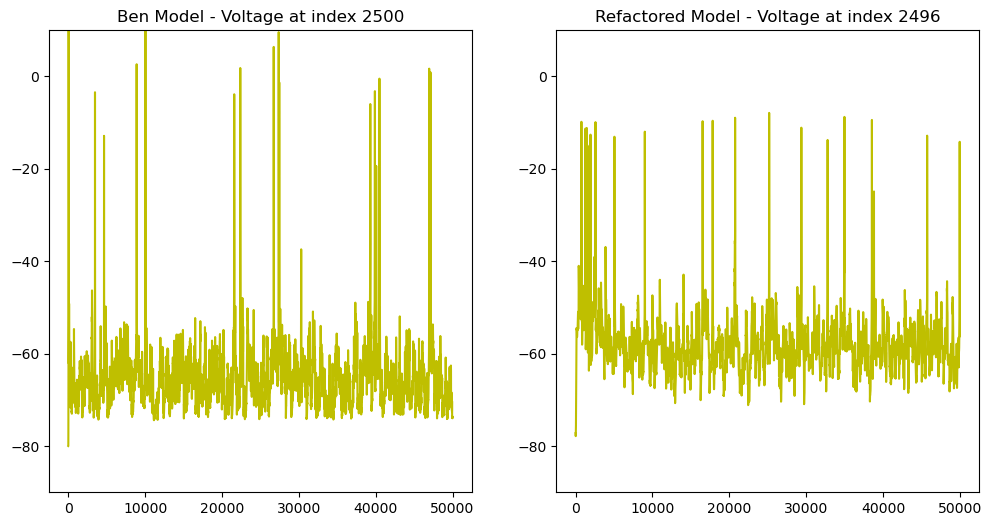

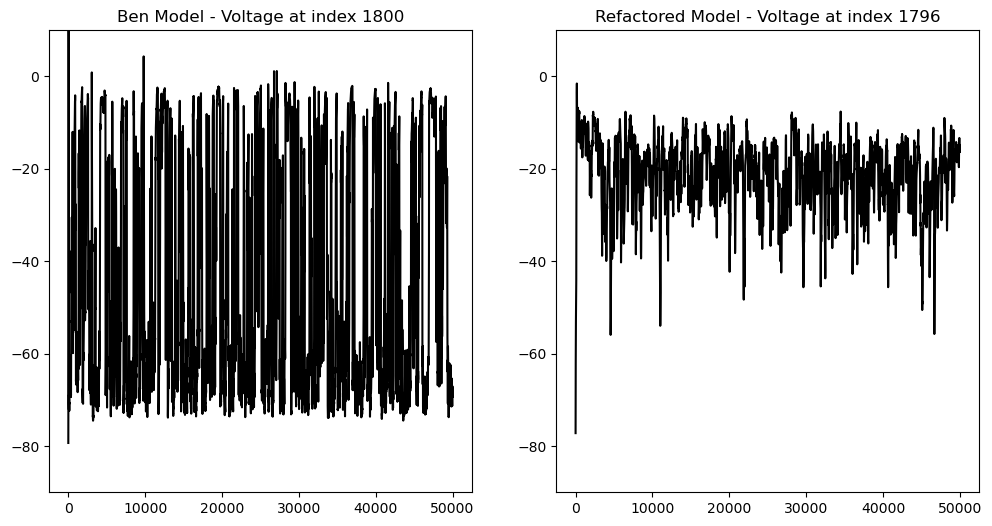

In [38]:
# time_points=np.arange(50000,100000)
time_points=np.arange(0,50000)
colors = [color.split('*')[0] for color in colors]
for i,idx in enumerate(apic_indices):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(models['ben']['v'][time_points, idx], colors[i])
    plt.ylim([-90, 10])
    plt.title(f'Ben Model - Voltage at index {idx}')
    
    plt.subplot(1, 2, 2)
    plt.plot(models['refactored']['v'][time_points, segment_mapping[idx]], colors[i])
    plt.ylim([-90, 10])
    plt.title(f'Refactored Model - Voltage at index {segment_mapping[idx]}')
    
    plt.show()


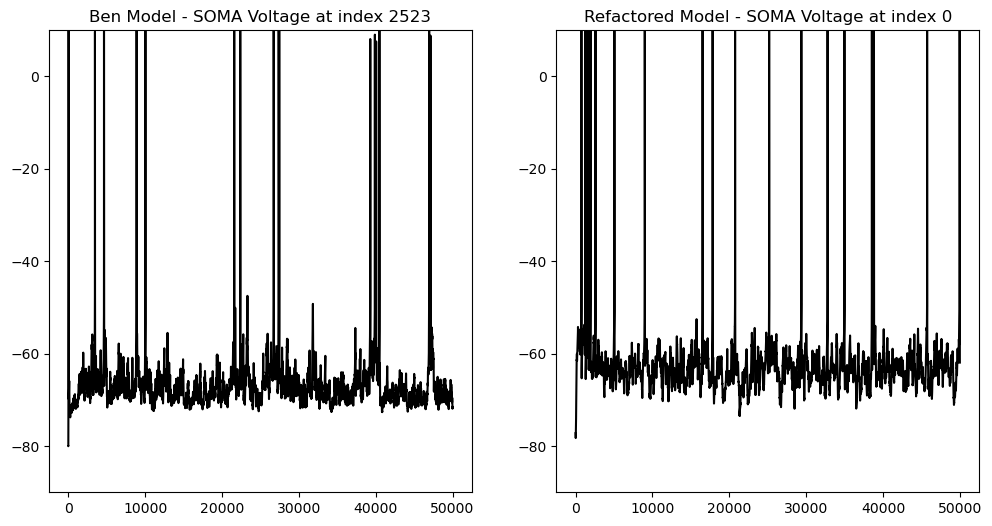

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(models['ben']['v'][time_points, 2523], colors[i])
plt.ylim([-90, 10])
plt.title(f'Ben Model - SOMA Voltage at index {2523}')

plt.subplot(1, 2, 2)
plt.plot(models['refactored']['v'][time_points, 0], colors[i])
plt.ylim([-90, 10])
plt.title(f'Refactored Model - SOMA Voltage at index {0}')

plt.show()


In [40]:
soma_segs_refactored = segs_refactored[segs_refactored['Type']=='soma']

In [41]:
soma_segs_ben = segs_ben[segs_ben['Type']=='soma']

In [42]:
soma_segs_ben

,Type,Sec ID,BMTK ID,X,Distance,Section_L,Section_diam,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,HVA_gbar,segmentID,Degrees,Elec_distanceQ
2521,soma,0,0,0.1,2.316936,23.169362,17.526643,-9.249733,-0.577674,0.0,0.998304,0.273257,0.0,0,0,None
2522,soma,0,0,0.3,6.950809,23.169362,17.526643,-4.624868,-0.288877,0.0,0.999362,0.273547,0.0,1,0,None
2523,soma,0,0,0.5,11.584681,23.169362,17.526643,-0.000010,0.000021,0.0,1.000000,0.273721,0.0,2,0,None
2524,soma,0,0,0.7,16.218553,23.169362,17.526643,4.624854,0.288824,0.0,0.999375,0.273550,0.0,3,0,None
2525,soma,0,0,0.9,20.852426,23.169362,17.526643,9.249712,0.577722,0.0,0.998281,0.273250,0.0,4,0,None


In [43]:
soma_segs_refactored

,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,Section_L,Section_diam,Distance,...,Sec ID,Type,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,X,segmentID,Elec_distanceQ
0,0,soma,0,0.081276,23.169408,L5PCtemplate[0].soma[0](0.5),NaN,23.169408,13.471518,0.0,...,0,soma,45.725557,18.343678,-50.25,1.0,0.290565,0.5,0,None


In [44]:
len(models['ben']['v'][:,2523])

1500000

In [45]:
# count spikes
print(sum(models['ben']['v'][:,2523] > 0) / (len(models['ben']['v'][:,2523]) / 10000))
print(sum(models['refactored']['v'][:,0] > 0) / (len(models['refactored']['v'][:,0]) / 10000))

11.126666666666667
10.60998939001061


In [46]:
import numpy as np

# Function to count the first occurrence of True in consecutive trues
def count_first_true(arr):
    return np.sum((arr > -10) & np.concatenate(([True], arr[:-1] <= -10)))

# Count spikes in the 'ben' model
ben_spike_count = count_first_true(models['ben']['v'][:, 2523])
ben_spike_rate = ben_spike_count / (len(models['ben']['v'][:, 2523]) / 10000)
print(round(ben_spike_rate,3))

# Count spikes in the 'refactored' model
refactored_spike_count = count_first_true(models['refactored']['v'][:, 0])
refactored_spike_rate = refactored_spike_count / (len(models['refactored']['v'][:, 0]) / 10000)
print(round(refactored_spike_rate, 3))

3.253
3.33


In [47]:
np.log(0.45) - 0.5 * np.log((0.35/0.45)**2 + 1)

-1.0350503441093433